<a href="https://colab.research.google.com/github/hangdragon/Hgdragon_Computer_Science/blob/master/Data_augmentation_mnist_Learning_modified_B515211_%ED%95%9C%EC%A7%80%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
<Data Augmentation을 이용하여 mnist를 다양하게 변형시키고, 그것을 학습시킨 DLP의 성능 분석 알고리즘>

////////홍익대학교 전자전기공학부 4학년 B515211 한지용////////

#코드의 큰 틀 -> Mnist class로!
Mnist라는 class를 만드는데,

멤버 변수 :
1) original train, test data
2) scaling,rotation,flipping에 관한 비율들
3) train과 test를 용이하게 도와줄 self.idx와 각종 flag들. (멤버함수인 scaling(),rotation(),flipping()은 각각 flag값의 설정에 의해 체계적으로 운용된다.)
4) augmentation 전과 후의 test 또는 train data의 모델 파라미터를 담을 그릇들

멤버 함수:
a) rotation : 회전 시킴
b) flipping : 반전 시킴
c) scaling : Decimation(다운샘플링, 다운스케일링)
d) showing_pictures : plt를 이용하여 원래 그림과 augmentation된 그림을 각각 보여줌.
e) DLP_train : DLP로 train을 시킨다.
f) DLP_test : DLP로 test를 시킨다.
g) setting_flag : flag값을 변화시켜서 각 augmentation의 제어를 담당.
h) original_mnist_learning : 맨 처음으로 순수하게 mnist를 학습시키는 과정
i) mnist_dlp.measuring_robustness : test data들만 변화시켜 기존의 모델의 robustness를 분석
j) mnist_dlp.inhancing_accuracy_by_retraining : test data 뿐만 아니라 training data까지 변화시켜서 새로 학습을 시킨다. 이로 인해 각각 Augmentation 된 test data들에 대해서도 robust해진다.
k) mnist_dlp.show_result : scaling , rotation, flipping의 robustness 및 개선된 accuracy를 분석하여 결과를 나타내줌. 그리고 이 함수를 끝으로 메인함수도 끝난다.
"""

In [1]:
# 오직 tf 1.x버전으로만 코딩했기 때문에 본래의 colab의 tf 2.2.0과는 너무 심한 충돌이 있어서 그 버전을 지우고 새로 깔았다.
!pip uninstall tensorflow
!pip install tensorflow==1.15

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 412.3MB 21kB/s 
     |████████████████████████████████| 3.8MB 34.9MB/s 
     |████████████████████████████████| 512kB 43.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5e87e435b78b5bce3ddec41f5ecac40e1dc2709b720e508116862bf7219de558
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

$

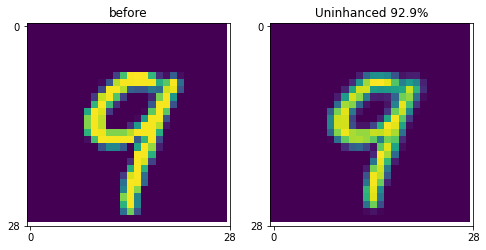

$test data가 92.9%만큼 Decimation 되었을 때의 accuracy : 0.975

$test data를 85.7%씩 scaling(Decimation) 하겠습니다.


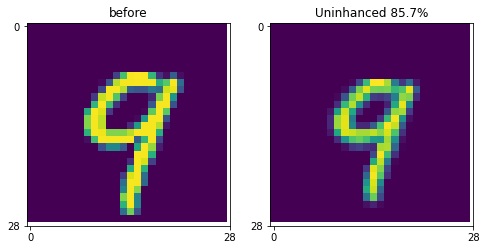

$test data가 85.7%만큼 Decimation 되었을 때의 accuracy : 0.9289

$test data를 71.4%씩 scaling(Decimation) 하겠습니다.


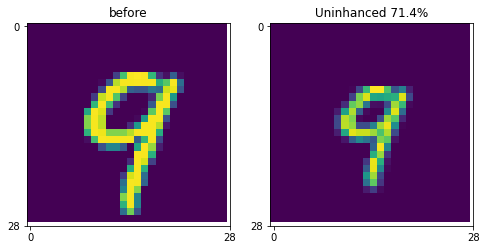

$test data가 71.4%만큼 Decimation 되었을 때의 accuracy : 0.6392

$test data를 50.0%씩 scaling(Decimation) 하겠습니다.


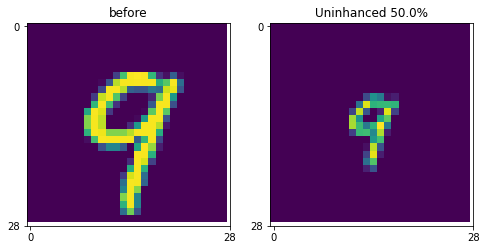

$test data가 50.0%만큼 Decimation 되었을 때의 accuracy : 0.2849

$test data를 28.6%씩 scaling(Decimation) 하겠습니다.


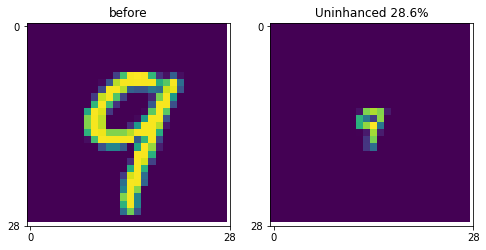

$test data가 28.6%만큼 Decimation 되었을 때의 accuracy : 0.1774

$Rotation Angle을 10, 20, 30, 40, 50, 60도로 하여 robustness를 조사하겠습니다.

$test data를 10씩 Rotation 하겠습니다.


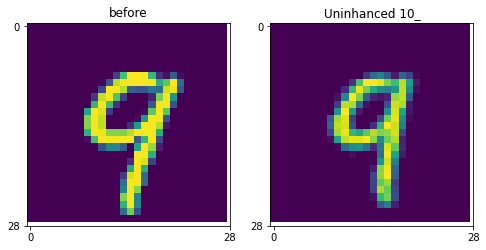

$test data가 10_만큼 Rotation 되었을 때의 accuracy : 0.9461

$test data를 20씩 Rotation 하겠습니다.


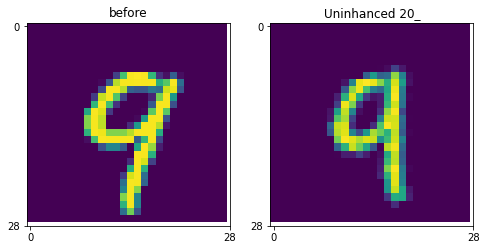

$test data가 20_만큼 Rotation 되었을 때의 accuracy : 0.8857

$test data를 30씩 Rotation 하겠습니다.


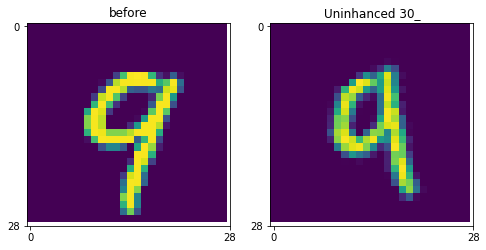

$test data가 30_만큼 Rotation 되었을 때의 accuracy : 0.7392

$test data를 40씩 Rotation 하겠습니다.


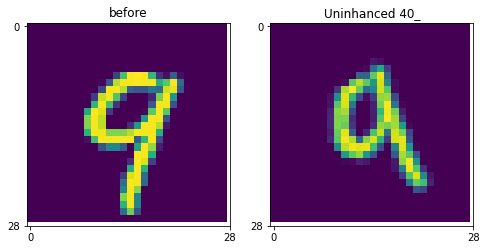

$test data가 40_만큼 Rotation 되었을 때의 accuracy : 0.5357

$test data를 50씩 Rotation 하겠습니다.


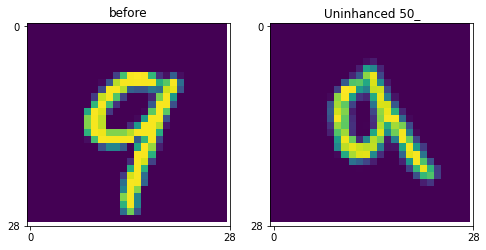

$test data가 50_만큼 Rotation 되었을 때의 accuracy : 0.3651

$test data를 60씩 Rotation 하겠습니다.


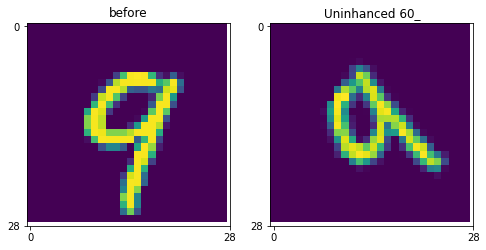

$test data가 60_만큼 Rotation 되었을 때의 accuracy : 0.2467

$Flipping Direction을 상하반전, 좌우반전 으로 하여 robustness를 조사하겠습니다.

$test data를 up_down_flip 하겠습니다.


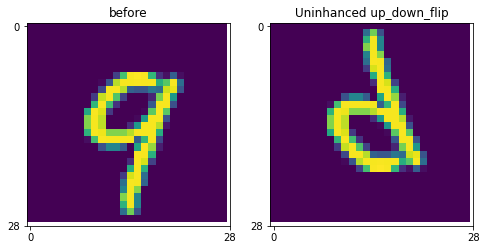

$test data가 up_down_flip 하였을 때의 accuracy : 0.3346

$test data를 left_right_flip 하겠습니다.


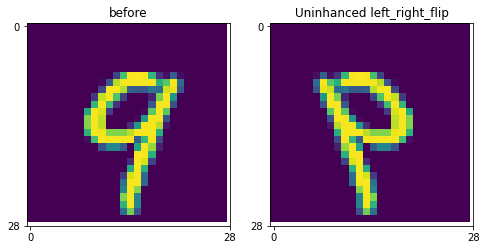

$test data가 left_right_flip 하였을 때의 accuracy : 0.4268

$training data도 augmentation해주어 robustness를 inhancing 하겠습니다.
$scaling rate : 92.9% ,85.7% ,71.4% ,50.0% ,28.6%
$Rotation Angle : 10도, 20도, 30도, 40도, 50도, 60도
Flipping Direction : 상하반전, 좌우반전

train data를 92.9%씩 scaling(Decimation) 하겠습니다.


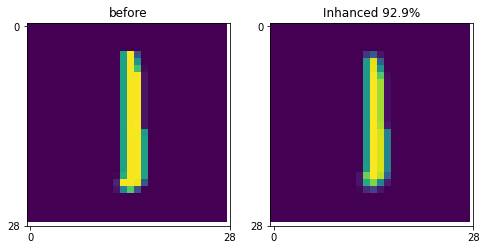

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.399
Epoch: 0002 Avg. cost =  0.162
Epoch: 0003 Avg. cost =  0.109
Epoch: 0004 Avg. cost =  0.082
Epoch: 0005 Avg. cost =  0.065
Epoch: 0006 Avg. cost =  0.052
Epoch: 0007 Avg. cost =  0.042
Epoch: 0008 Avg. cost =  0.036
Epoch: 0009 Avg. cost =  0.028
Epoch: 0010 Avg. cost =  0.024
Epoch: 0011 Avg. cost =  0.019
Epoch: 0012 Avg. cost =  0.017
Epoch: 0013 Avg. cost =  0.013
Epoch: 0014 Avg. cost =  0.012
Epoch: 0015 Avg. cost =  0.010
$Optimization done!

$train data가 92.9%만큼 Decimation 되었을 때의 accuracy : 0.9815
train data를 85.7%씩 scaling(Decimation) 하겠습니다.


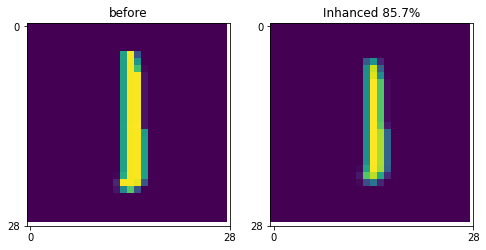

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.414
Epoch: 0002 Avg. cost =  0.175
Epoch: 0003 Avg. cost =  0.121
Epoch: 0004 Avg. cost =  0.090
Epoch: 0005 Avg. cost =  0.071
Epoch: 0006 Avg. cost =  0.059
Epoch: 0007 Avg. cost =  0.046
Epoch: 0008 Avg. cost =  0.039
Epoch: 0009 Avg. cost =  0.032
Epoch: 0010 Avg. cost =  0.027
Epoch: 0011 Avg. cost =  0.022
Epoch: 0012 Avg. cost =  0.019
Epoch: 0013 Avg. cost =  0.015
Epoch: 0014 Avg. cost =  0.013
Epoch: 0015 Avg. cost =  0.010
$Optimization done!

$train data가 85.7%만큼 Decimation 되었을 때의 accuracy : 0.979
train data를 71.4%씩 scaling(Decimation) 하겠습니다.


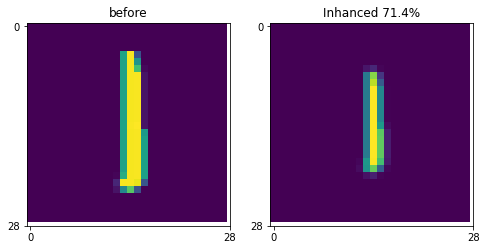

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.440
Epoch: 0002 Avg. cost =  0.192
Epoch: 0003 Avg. cost =  0.135
Epoch: 0004 Avg. cost =  0.103
Epoch: 0005 Avg. cost =  0.082
Epoch: 0006 Avg. cost =  0.067
Epoch: 0007 Avg. cost =  0.056
Epoch: 0008 Avg. cost =  0.047
Epoch: 0009 Avg. cost =  0.040
Epoch: 0010 Avg. cost =  0.034
Epoch: 0011 Avg. cost =  0.030
Epoch: 0012 Avg. cost =  0.026
Epoch: 0013 Avg. cost =  0.022
Epoch: 0014 Avg. cost =  0.019
Epoch: 0015 Avg. cost =  0.016
$Optimization done!

$train data가 71.4%만큼 Decimation 되었을 때의 accuracy : 0.9805
train data를 50.0%씩 scaling(Decimation) 하겠습니다.


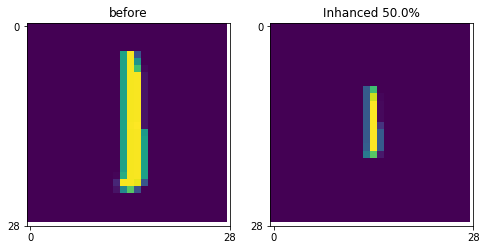

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.508
Epoch: 0002 Avg. cost =  0.238
Epoch: 0003 Avg. cost =  0.176
Epoch: 0004 Avg. cost =  0.138
Epoch: 0005 Avg. cost =  0.112
Epoch: 0006 Avg. cost =  0.094
Epoch: 0007 Avg. cost =  0.081
Epoch: 0008 Avg. cost =  0.070
Epoch: 0009 Avg. cost =  0.062
Epoch: 0010 Avg. cost =  0.054
Epoch: 0011 Avg. cost =  0.048
Epoch: 0012 Avg. cost =  0.043
Epoch: 0013 Avg. cost =  0.038
Epoch: 0014 Avg. cost =  0.034
Epoch: 0015 Avg. cost =  0.030
$Optimization done!

$train data가 50.0%만큼 Decimation 되었을 때의 accuracy : 0.9798
train data를 28.6%씩 scaling(Decimation) 하겠습니다.


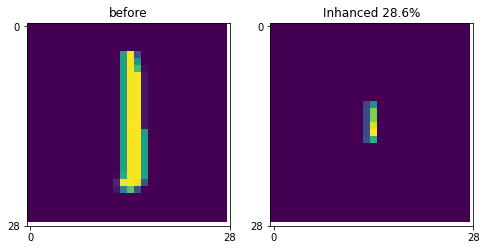

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.715
Epoch: 0002 Avg. cost =  0.358
Epoch: 0003 Avg. cost =  0.296
Epoch: 0004 Avg. cost =  0.250
Epoch: 0005 Avg. cost =  0.218
Epoch: 0006 Avg. cost =  0.193
Epoch: 0007 Avg. cost =  0.173
Epoch: 0008 Avg. cost =  0.159
Epoch: 0009 Avg. cost =  0.145
Epoch: 0010 Avg. cost =  0.135
Epoch: 0011 Avg. cost =  0.126
Epoch: 0012 Avg. cost =  0.119
Epoch: 0013 Avg. cost =  0.112
Epoch: 0014 Avg. cost =  0.106
Epoch: 0015 Avg. cost =  0.100
$Optimization done!

$train data가 28.6%만큼 Decimation 되었을 때의 accuracy : 0.9702
$Rotation Angle을 10, 20, 30, 40, 50, 60도로 하여 robustness를 조사하겠습니다.

$train data를 10씩 Rotation 하겠습니다.


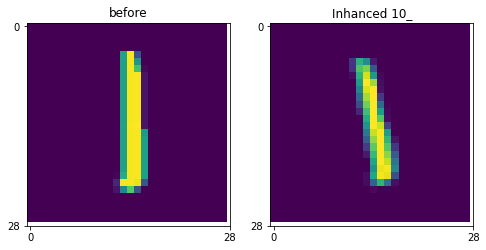

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.400
Epoch: 0002 Avg. cost =  0.168
Epoch: 0003 Avg. cost =  0.116
Epoch: 0004 Avg. cost =  0.085
Epoch: 0005 Avg. cost =  0.067
Epoch: 0006 Avg. cost =  0.053
Epoch: 0007 Avg. cost =  0.043
Epoch: 0008 Avg. cost =  0.036
Epoch: 0009 Avg. cost =  0.029
Epoch: 0010 Avg. cost =  0.024
Epoch: 0011 Avg. cost =  0.020
Epoch: 0012 Avg. cost =  0.018
Epoch: 0013 Avg. cost =  0.014
Epoch: 0014 Avg. cost =  0.011
Epoch: 0015 Avg. cost =  0.010
$Optimization done!

$train data가 10_만큼 Rotation 되었을 때의 accuracy : 0.9798
$train data를 20씩 Rotation 하겠습니다.


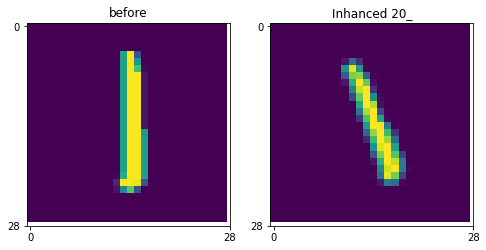

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.398
Epoch: 0002 Avg. cost =  0.166
Epoch: 0003 Avg. cost =  0.112
Epoch: 0004 Avg. cost =  0.085
Epoch: 0005 Avg. cost =  0.066
Epoch: 0006 Avg. cost =  0.053
Epoch: 0007 Avg. cost =  0.044
Epoch: 0008 Avg. cost =  0.035
Epoch: 0009 Avg. cost =  0.029
Epoch: 0010 Avg. cost =  0.023
Epoch: 0011 Avg. cost =  0.019
Epoch: 0012 Avg. cost =  0.016
Epoch: 0013 Avg. cost =  0.013
Epoch: 0014 Avg. cost =  0.011
Epoch: 0015 Avg. cost =  0.010
$Optimization done!

$train data가 20_만큼 Rotation 되었을 때의 accuracy : 0.9784
$train data를 30씩 Rotation 하겠습니다.


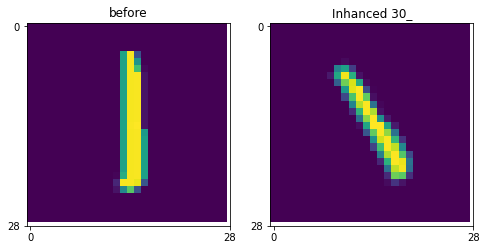

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.405
Epoch: 0002 Avg. cost =  0.171
Epoch: 0003 Avg. cost =  0.117
Epoch: 0004 Avg. cost =  0.087
Epoch: 0005 Avg. cost =  0.067
Epoch: 0006 Avg. cost =  0.053
Epoch: 0007 Avg. cost =  0.044
Epoch: 0008 Avg. cost =  0.036
Epoch: 0009 Avg. cost =  0.029
Epoch: 0010 Avg. cost =  0.024
Epoch: 0011 Avg. cost =  0.020
Epoch: 0012 Avg. cost =  0.016
Epoch: 0013 Avg. cost =  0.014
Epoch: 0014 Avg. cost =  0.012
Epoch: 0015 Avg. cost =  0.009
$Optimization done!

$train data가 30_만큼 Rotation 되었을 때의 accuracy : 0.9808
$train data를 40씩 Rotation 하겠습니다.


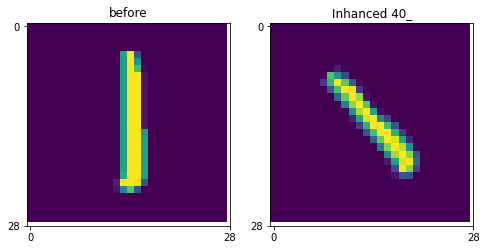

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.400
Epoch: 0002 Avg. cost =  0.168
Epoch: 0003 Avg. cost =  0.115
Epoch: 0004 Avg. cost =  0.086
Epoch: 0005 Avg. cost =  0.068
Epoch: 0006 Avg. cost =  0.055
Epoch: 0007 Avg. cost =  0.045
Epoch: 0008 Avg. cost =  0.036
Epoch: 0009 Avg. cost =  0.030
Epoch: 0010 Avg. cost =  0.024
Epoch: 0011 Avg. cost =  0.020
Epoch: 0012 Avg. cost =  0.017
Epoch: 0013 Avg. cost =  0.014
Epoch: 0014 Avg. cost =  0.012
Epoch: 0015 Avg. cost =  0.010
$Optimization done!

$train data가 40_만큼 Rotation 되었을 때의 accuracy : 0.9794
$train data를 50씩 Rotation 하겠습니다.


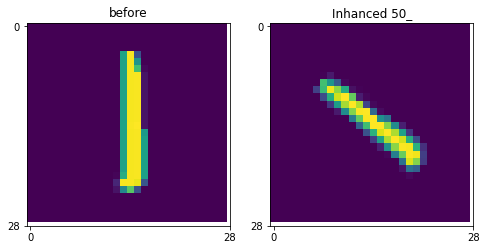

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.403
Epoch: 0002 Avg. cost =  0.171
Epoch: 0003 Avg. cost =  0.115
Epoch: 0004 Avg. cost =  0.086
Epoch: 0005 Avg. cost =  0.066
Epoch: 0006 Avg. cost =  0.055
Epoch: 0007 Avg. cost =  0.044
Epoch: 0008 Avg. cost =  0.036
Epoch: 0009 Avg. cost =  0.029
Epoch: 0010 Avg. cost =  0.025
Epoch: 0011 Avg. cost =  0.021
Epoch: 0012 Avg. cost =  0.017
Epoch: 0013 Avg. cost =  0.015
Epoch: 0014 Avg. cost =  0.011
Epoch: 0015 Avg. cost =  0.010
$Optimization done!

$train data가 50_만큼 Rotation 되었을 때의 accuracy : 0.9778
$train data를 60씩 Rotation 하겠습니다.


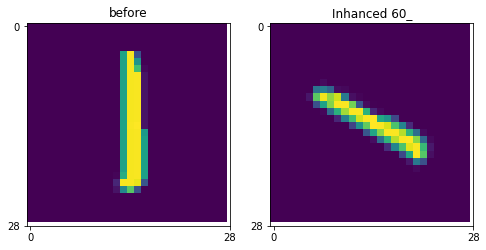

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.400
Epoch: 0002 Avg. cost =  0.168
Epoch: 0003 Avg. cost =  0.115
Epoch: 0004 Avg. cost =  0.086
Epoch: 0005 Avg. cost =  0.067
Epoch: 0006 Avg. cost =  0.054
Epoch: 0007 Avg. cost =  0.044
Epoch: 0008 Avg. cost =  0.036
Epoch: 0009 Avg. cost =  0.029
Epoch: 0010 Avg. cost =  0.024
Epoch: 0011 Avg. cost =  0.020
Epoch: 0012 Avg. cost =  0.017
Epoch: 0013 Avg. cost =  0.013
Epoch: 0014 Avg. cost =  0.012
Epoch: 0015 Avg. cost =  0.010
$Optimization done!

$train data가 60_만큼 Rotation 되었을 때의 accuracy : 0.9781
$Flipping Direction을 상하반전, 좌우반전 으로 하여 robustness를 조사하겠습니다.

$train data를 up_down_flip 하겠습니다.


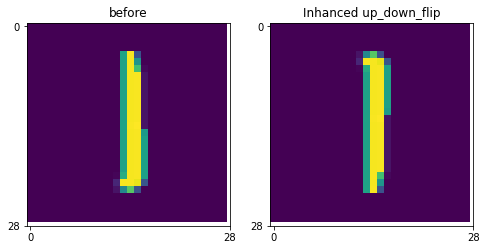

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.379
Epoch: 0002 Avg. cost =  0.152
Epoch: 0003 Avg. cost =  0.100
Epoch: 0004 Avg. cost =  0.073
Epoch: 0005 Avg. cost =  0.056
Epoch: 0006 Avg. cost =  0.042
Epoch: 0007 Avg. cost =  0.033
Epoch: 0008 Avg. cost =  0.025
Epoch: 0009 Avg. cost =  0.019
Epoch: 0010 Avg. cost =  0.016
Epoch: 0011 Avg. cost =  0.013
Epoch: 0012 Avg. cost =  0.010
Epoch: 0013 Avg. cost =  0.007
Epoch: 0014 Avg. cost =  0.009
Epoch: 0015 Avg. cost =  0.006
$Optimization done!

$train data가 up_down_flip 하였을 때의 accuracy : 0.981
$train data를 left_right_flip 하겠습니다.


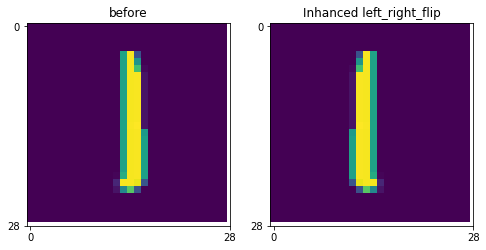

$학습을 시작하겠습니다.
$batch size : 100 , total batch : 550 , total epoch : 15

Epoch: 0001 Avg. cost =  0.379
Epoch: 0002 Avg. cost =  0.152
Epoch: 0003 Avg. cost =  0.099
Epoch: 0004 Avg. cost =  0.072
Epoch: 0005 Avg. cost =  0.055
Epoch: 0006 Avg. cost =  0.042
Epoch: 0007 Avg. cost =  0.032
Epoch: 0008 Avg. cost =  0.025
Epoch: 0009 Avg. cost =  0.019
Epoch: 0010 Avg. cost =  0.015
Epoch: 0011 Avg. cost =  0.012
Epoch: 0012 Avg. cost =  0.010
Epoch: 0013 Avg. cost =  0.008
Epoch: 0014 Avg. cost =  0.006
Epoch: 0015 Avg. cost =  0.006
$Optimization done!

$train data가 left_right_flip 하였을 때의 accuracy : 0.9793

====================================최종 결과 분석=======================================

1) [scaling]

92.9%만큼 scaling 했을때 ==> 개선 전 : 0.975000 -> 개선 후 : 0.981500
85.7%만큼 scaling 했을때 ==> 개선 전 : 0.928900 -> 개선 후 : 0.979000
71.4%만큼 scaling 했을때 ==> 개선 전 : 0.639200 -> 개선 후 : 0.980500
50.0%만큼 scaling 했을때 ==> 개선 전 : 0.284900 -> 개선 후 : 0.979800
28.6%만큼 scaling 했을때 ==> 개선 전 : 0.177400 -> 개선 후 : 0.

In [2]:
#-*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
if tf.__version__ >="2.0":
    #mnist = tf.keras.datasets.mnist
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("data/", one_hot=True)

    #mnist = tf.keras.datasets.mnist

elif tf.__version__ <"2.0" :
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("data/", one_hot=True)
print('\n$전역변수 mnist 생성 완료!')

sess = tf.Session() #그냥 세션을 전역변수로 해줬다. 그 이유는 각 멤버함수의 스택이 끝나고, 학습으로 얻어낸 데이터들이 서로 연동되고 살아있게 하기 위함이다.

class Mnist:
    def __init__(self):
        print('$Mnist 객체가 생성되었습니다. 이 객체안에는 mnist의 DLP 성능분석을 위한 모든 것들이 다 들어있습니다.\n')

        ########train할 mnist에 대하여, original, scaling, rotation, fliping한 4종류의 mnist_set들을 멤버변수로 추가한다.#########
        self.train_images = mnist.train.images
        self.train_labels = mnist.train.labels
        self.test_images = mnist.test.images
        self.test_labels = mnist.test.labels

        ########train할 mnist에 대하여 Data Augumentation들을 위한 값들을 멤버변수로 추가한다.#########
        self.scaling_rate_set = [26 / 28, 24 / 28, 20 / 28, 14 / 28, 8 / 28]
        self.zero_padding_set = [((1, 1), (1, 1)), ((2, 2), (2, 2)), ((4, 4), (4, 4)), ((7, 7), (7, 7)),((10, 10), (10, 10))]
        self.scaling_rate_str_percentage_set = [f'{self.scaling_rate_set[i] * 100:.1f}%' for i in range(5)]

        self.rotation_angle_set = [10,20,30,40,50,60]
        self.rotation_angle_str_set = ['10_','20_','30_','40_','50_','60_']

        self.fliping_direction_set = [0,1] # 0 : 상하반전 1 : 좌우 반전
        self.fliping_direction_str_set = ['up_down_flip','left_right_flip']

        self.idx = 0

        #self.X_Y_L2_original = {'X':None,'Y':None,"L2":None} #training data도 ,test data도 전부 다 augmentation이 되지 않은 원래의 mnist 학습 모델 파라미터.
        #self.X_Y_L2_augmentation_dict = {'s' : {},'r' : {} ,'f' : {}} #s , r , f을 통해 나온 각각의 모델 파라미터들
        self.X_Y_L2_result_dict = {
            'original': {
                'X': None,
                'Y': None,
                'L2' : None
            },
            'augmentation': {
                's' : {
                    self.scaling_rate_str_percentage_set[0]: {
                        'X': None,
                        'Y' : None,
                        'L2' : None
                    },
                    self.scaling_rate_str_percentage_set[1]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.scaling_rate_str_percentage_set[2]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.scaling_rate_str_percentage_set[3]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.scaling_rate_str_percentage_set[4]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    }
                },
                'r' : {
                    self.rotation_angle_str_set[0]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.rotation_angle_str_set[1]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.rotation_angle_str_set[2]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.rotation_angle_str_set[3]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.rotation_angle_str_set[4]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.rotation_angle_str_set[5]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                },
                'f' : {
                    self.fliping_direction_str_set[0]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    },
                    self.fliping_direction_str_set[1]: {
                        'X': None,
                        'Y': None,
                        'L2': None
                    }
                }
            }
        }

        self.flag_of_train_augmentation = 'OFF' # 값은 'OFF' 혹은 'ON' 둘중 하나가 된다. 각각의 값들에 따라 self.accuracy_result_dict에서 해당 위치의 키로 이동하여 값을 저장한다.
        # OFF면 DLP_train시에 X_Y_L2들을 self.X_Y_L2_original에 저장하고, ON이면 DLP_train시에 X_Y_L2들을 self.X_Y_L2_augmentation_dict에 저장한다.
        # 항상 학습전에 flag를 설정해준다음 학습을 진행한다.

        ####### 아래는 accuracy result 들을 저장하기 위한 딕셔너리
        self.accuracy_result_dict = {
            'original': None, # training data도, test data도 어떠한 augmentation도 없는 순수 그 자체 원래의 mnist 학습 결과 accuracy (대략 0.98)
            'no_augmentation': { # test data만 augmentation하여 robustness를 측정할때 , 그 측정 지표로 볼 accuracy들을 모아두는 곳
                's': {},  # 참고로 , 각각의 accuracy 결과들은 augmentation 함수들을 통해 각각 저장될 예정이다.
                'r': {},
                'f': {}
            },
            'augmentation': { # training data를 augmentation해주고, 각각의 test data로 확인해주었을때의 개선된 accuracy들을 모아두는 곳
                's': {},  # 참고로 , 각각의 accuracy 결과들은 augmentation 함수들을 통해 각각 저장될 예정이다.
                'r': {},
                'f': {}
            }
        }
        self.flag_of_test_augmentation = 'ORI' # 값은 'ORI' , 'ROB' , 'AUG' 셋중에 하나가 된다. 각각의 값들에 따라 self.accuracy_result_dict에서 해당 위치의 키로 이동하여 값을 저장한다.
        # ORI -> DLP.test()시에 accuracy를 self.accuracy_result_dict['original']에 저장한다.
        # ROB -> DLP.test()시에 accuracy를 self.accuracy_result_dict['no_augmentation']에 저장한다.
        # AUG -> DLP.test()시에 accuracy를 self.accuracy_result_dict['augmentation']에 저장한다.
        self.flag_of_augmentation_mode = None

        self.test_data_images_set = {
            'original': mnist.test.images,
            'augmentation': {  # test data로 확인해주었을때의 개선된 accuracy들을 모아두는 곳
                's': {},  # 참고로 , 각각의 accuracy 결과들은 augmentation 함수들을 통해 각각 저장될 예정이다.
                'r': {},
                'f': {}
            }
        }

    def scaling(self,data_set, scaling_rate=5,inter_mode=cv2.INTER_AREA):  # mnist.train.images이건, mnist.test.images이건간에, 그 전부를 통째로 다 s_rate만큼 scaling 시켜버린다.
        if self.flag_of_train_augmentation == 'OFF' and self.flag_of_test_augmentation == 'ROB' : #scaling의 robustness를 측정하고자 할 떄.
            self.flag_of_augmentation_mode = 's'
            for i in range(len(self.scaling_rate_set)):
                print(f'$test data를 {self.scaling_rate_str_percentage_set[i]}씩 scaling(Decimation) 하겠습니다.')
                scalied_data_set = []
                for j in range(len(data_set)):
                    scalied_data_set.append(cv2.resize(data_set[j].reshape((28, 28)), None, fx=self.scaling_rate_set[i], fy=self.scaling_rate_set[i],interpolation=inter_mode).tolist())
                    # cv2.resize()를 해주기 위해서는 반드시 mnist를 2차원 ndarray형태로 만들어줘야한다.
                    scalied_data_set[j] = np.pad(scalied_data_set[j], self.zero_padding_set[self.idx], 'constant', constant_values=(0))

                scalied_data_set = np.array(scalied_data_set)
                scalied_data_set_for_learning, scalied_data_set_for_showing = scalied_data_set.reshape((10000, 784)), scalied_data_set  # 학습용, 사진용으로 언패킹

                self.showing_pictures(data_set, scalied_data_set_for_showing)  # 그림 보여주기
                self.test_data_images_set['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]] = scalied_data_set_for_learning  #미리 바뀐 test 이미지 저장
                self.test_images = scalied_data_set_for_learning
                self.DLP_test()

        elif self.flag_of_train_augmentation == 'ON' and self.flag_of_test_augmentation == 'AUG' :
            self.flag_of_augmentation_mode = 's'
            for i in range(len(self.scaling_rate_set)):
                print(f'train data를 {self.scaling_rate_str_percentage_set[i]}씩 scaling(Decimation) 하겠습니다.')
                scalied_data_set = []
                for j in range(len(data_set)):
                    scalied_data_set.append(cv2.resize(data_set[j].reshape((28, 28)), None, fx=self.scaling_rate_set[i],
                                                       fy=self.scaling_rate_set[i], interpolation=inter_mode).tolist())
                    # cv2.resize()를 해주기 위해서는 반드시 mnist를 2차원 ndarray형태로 만들어줘야한다.
                    scalied_data_set[j] = np.pad(scalied_data_set[j], self.zero_padding_set[self.idx], 'constant',constant_values=(0))

                scalied_data_set = np.array(scalied_data_set)
                scalied_data_set_for_learning, scalied_data_set_for_showing = scalied_data_set.reshape((55000, 784)), scalied_data_set  # 학습용, 사진용으로 언패킹
                self.showing_pictures(data_set, scalied_data_set_for_showing)  # 그림 보여주기
                self.train_images = scalied_data_set_for_learning #
                self.DLP_train()
                self.DLP_test()

    def rotation(self,data_set, rotation_angle=5):
        if self.flag_of_train_augmentation == 'OFF' and self.flag_of_test_augmentation == 'ROB' : #test data만 augmentation을 주어서 scaling의 robustness를 측정하고자 할 떄.
            print(f'$Rotation Angle을 10, 20, 30, 40, 50, 60도로 하여 robustness를 조사하겠습니다.\n')
            self.flag_of_augmentation_mode = 'r'
            for i in range(len(self.rotation_angle_set)): #6번의 각도 change
                print(f'$test data를 {self.rotation_angle_set[i]}씩 Rotation 하겠습니다.')
                rotated_data_set = [] #mnist안의 모든 이미지들을 하나하나 다 변환해준다음 그 값들을 저장해줄 저장소

                for j in range(len(data_set)):
                    original_picture = data_set[j].reshape((28, 28))  # 1차원 ndarray를 2차원으로 만들어준다. mnist.train.images[idx].reshape((28,28))

                    original_picture_shape = original_picture.shape  # 얘는 회전 변환된 1차 이미지 신호를 원래의 크기에 맞게 선형변환 시켜주는 함수에 들어가는 아규먼트이다. 원래함수의 shape를 입력해줘야 그 크기로 복구가능

                    # 아래는 cv2의 회전변환 메소드를 쓰기위해 아규먼트로 넘겨줄 회전 변환된 이미지의 center이다. 이 center좌표를 축으로 회전 시킬 예정이다.
                    rotated_picture_center_x, rotate_picture_center_y = original_picture.shape
                    rotate_picture_center = (rotated_picture_center_x // 2, rotate_picture_center_y // 2)

                    tmp_rotated_picture = cv2.getRotationMatrix2D(rotate_picture_center, self.rotation_angle_set[i],0.9)  # 1차 회전변환 (추후 선형변환으로 조정 필요)
                    rotated_picture = cv2.warpAffine(original_picture, tmp_rotated_picture,original_picture_shape)  # 얘는 2차원 배열이라 1차원으로 다시 reshape해줘야해
                    rotated_data_set.append(rotated_picture)

                rotated_data_set = np.array(rotated_data_set)
                rotated_data_set_for_learning, rotated_data_set_for_showing = rotated_data_set.reshape((10000, 784)), rotated_data_set  # 학습용, 사진용으로 언패킹
                self.showing_pictures(data_set, rotated_data_set_for_showing)  # 그림 보여주기
                self.test_data_images_set['augmentation']['r'][self.rotation_angle_str_set[i]] = rotated_data_set_for_learning
                self.test_images = rotated_data_set_for_learning
                self.DLP_test()

        elif self.flag_of_train_augmentation == 'ON' and self.flag_of_test_augmentation == 'AUG' :
            print(f'$Rotation Angle을 10, 20, 30, 40, 50, 60도로 하여 robustness를 조사하겠습니다.\n')

            self.flag_of_augmentation_mode = 'r'
            for i in range(len(self.rotation_angle_set)): #6번의 각도 change
                print(f'$train data를 {self.rotation_angle_set[i]}씩 Rotation 하겠습니다.')
                rotated_data_set = [] #mnist안의 모든 이미지들을 하나하나 다 변환해준다음 그 값들을 저장해줄 저장소

                for j in range(len(data_set)):
                    original_picture = data_set[j].reshape((28, 28))  # 1차원 ndarray를 2차원으로 만들어준다. mnist.train.images[idx].reshape((28,28))
                    original_picture_shape = original_picture.shape  # 얘는 회전 변환된 1차 이미지 신호를 원래의 크기에 맞게 선형변환 시켜주는 함수에 들어가는 아규먼트이다. 원래함수의 shape를 입력해줘야 그 크기로 복구가능
                    # 아래는 cv2의 회전변환 메소드를 쓰기위해 아규먼트로 넘겨줄 회전 변환된 이미지의 center이다. 이 center좌표를 축으로 회전 시킬 예정이다.
                    rotated_picture_center_x, rotate_picture_center_y = original_picture.shape
                    rotate_picture_center = (rotated_picture_center_x // 2, rotate_picture_center_y // 2)
                    tmp_rotated_picture = cv2.getRotationMatrix2D(rotate_picture_center, self.rotation_angle_set[i],0.9)  # 1차 회전변환 (추후 선형변환으로 조정 필요)
                    rotated_picture = cv2.warpAffine(original_picture, tmp_rotated_picture,original_picture_shape)  # 얘는 2차원 배열이라 1차원으로 다시 reshape해줘야해
                    rotated_data_set.append(rotated_picture)

                rotated_data_set = np.array(rotated_data_set)
                rotated_data_set_for_learning, rotated_data_set_for_showing = rotated_data_set.reshape((55000, 784)), rotated_data_set  # 학습용, 사진용으로 언패킹
                self.showing_pictures(data_set, rotated_data_set_for_showing)  # 그림 보여주기
                self.train_images = rotated_data_set_for_learning
                self.DLP_train()
                self.DLP_test()

    def fliping(self,data_set,fliping_direction = 0):
        if self.flag_of_train_augmentation == 'OFF' and self.flag_of_test_augmentation == 'ROB' : #test data만 augmentation을 주어서 scaling의 robustness를 측정하고자 할 떄.
            print(f'$Flipping Direction을 상하반전, 좌우반전 으로 하여 robustness를 조사하겠습니다.\n')
            self.flag_of_augmentation_mode = 'f'

            for i in range(len(self.fliping_direction_set)) : #2번의 flipping
                print(f'$test data를 {self.fliping_direction_str_set[i]} 하겠습니다.')
                flipped_data_set = [] #mnist안의 모든 이미지들을 하나하나 다 변환해준다음 그 값들을 저장해줄 저장소
                for j in range(len(data_set)):
                    original_picture = data_set[j].reshape((28, 28))  # 1차원 ndarray를 2차원으로 만들어준다. mnist.train.images[idx].reshape((28,28))
                    flipped_picture = cv2.flip(original_picture, self.fliping_direction_set[i]) #상하 혹은 좌우 반전된 2차원 행렬
                    flipped_data_set.append(flipped_picture)

                flipped_data_set = np.array(flipped_data_set)
                flipped_data_set_for_learning, flipped_data_set_for_showing = flipped_data_set.reshape((10000, 784)), flipped_data_set  # 학습용, 사진용으로 언패킹
                self.showing_pictures(data_set, flipped_data_set_for_showing)  # 그림 보여주기
                self.test_data_images_set['augmentation']['f'][self.fliping_direction_str_set[i]] = flipped_data_set_for_learning
                self.test_images = flipped_data_set_for_learning
                self.DLP_test()

        elif self.flag_of_train_augmentation == 'ON' and self.flag_of_test_augmentation == 'AUG' :
            print(f'$Flipping Direction을 상하반전, 좌우반전 으로 하여 robustness를 조사하겠습니다.\n')
            self.flag_of_augmentation_mode = 'f'

            for i in range(len(self.fliping_direction_set)): #2번의 flipping
                print(f'$train data를 {self.fliping_direction_str_set[i]} 하겠습니다.')
                flipped_data_set = [] #mnist안의 모든 이미지들을 하나하나 다 변환해준다음 그 값들을 저장해줄 저장소
                for j in range(len(data_set)):
                    original_picture = data_set[j].reshape((28, 28))  # 1차원 ndarray를 2차원으로 만들어준다. mnist.train.images[idx].reshape((28,28))
                    flipped_picture = cv2.flip(original_picture, self.fliping_direction_set[i])  # 상하 혹은 좌우 반전된 2차원 행렬
                    flipped_data_set.append(flipped_picture)

                flipped_data_set = np.array(flipped_data_set)
                flipped_data_set_for_learning, flipped_data_set_for_showing = flipped_data_set.reshape((55000, 784)), flipped_data_set  # 학습용, 사진용으로 언패킹
                self.showing_pictures(data_set, flipped_data_set_for_showing)  # 그림 보여주기
                self.train_images = flipped_data_set_for_learning
                self.DLP_train()
                self.DLP_test()

    def showing_pictures(self,unchanged_data_set, data_set_for_showing): #unchanged는 augmentation전의 train또는 test데이터이고, data_set_for_showing은 바뀐 후의 train혹은 test 데이터

        mnist_idx = 12
        length_for_reshaping = int(np.sqrt(len(unchanged_data_set[mnist_idx])))
        unchanged_picture = unchanged_data_set[mnist_idx].reshape((length_for_reshaping,length_for_reshaping)) #이거 28x28인지 확인!
        changed_picture = data_set_for_showing[mnist_idx]
        subplot_pictures = [unchanged_picture,changed_picture]
        subplot_labels = ['before','after']

        fig = plt.figure(figsize = (8,8))

        for i in range(2): #원래꺼랑 augmentation된 것의 사진을 둘다 띄워서 변경이 잘 되었는지 확인.
            subplot = fig.add_subplot(1,2,i+1)
            subplot.imshow(subplot_pictures[i])
            subplot.set_xticks([0, subplot_pictures[i].shape[0]])
            subplot.set_yticks([0, subplot_pictures[i].shape[1]])
            subplot.set_title(subplot_labels[i])

        if self.flag_of_train_augmentation == 'OFF':
            if self.flag_of_augmentation_mode == 's':
                plt.title('Uninhanced '+self.scaling_rate_str_percentage_set[self.idx])
            elif self.flag_of_augmentation_mode == 'r' :
                plt.title('Uninhanced ' + self.rotation_angle_str_set[self.idx])
            elif self.flag_of_augmentation_mode == 'f' :
                plt.title('Uninhanced ' + self.fliping_direction_str_set[self.idx])

        elif self.flag_of_train_augmentation == 'ON':
            if self.flag_of_augmentation_mode == 's':
                plt.title('Inhanced '+self.scaling_rate_str_percentage_set[self.idx])
            elif self.flag_of_augmentation_mode == 'r' :
                plt.title('Inhanced ' + self.rotation_angle_str_set[self.idx])
            elif self.flag_of_augmentation_mode == 'f' :
                plt.title('Inhanced ' + self.fliping_direction_str_set[self.idx])
        plt.show()

    def DLP_train(self):

        X = tf.placeholder(tf.float32, [None, 784])  # data
        Y = tf.placeholder(tf.float32, [None, 10])  # label
        # =================================================
        # layer 1 processing
        # =================================================
        W1 = tf.Variable(tf.random_normal([784, 392], stddev=0.01))
        L1 = tf.nn.relu(tf.matmul(X, W1))
        # =================================================
        # layer 2 processing
        # =================================================
        W2 = tf.Variable(tf.random_normal([392, 10], stddev=0.01))
        L2 = tf.matmul(L1, W2)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=L2, labels=Y))
        optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
        # train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
        # =================================================
        # Data feed
        # =================================================
        init = tf.global_variables_initializer()
        sess.run(init)

        # ================================================================================================================
        # mini batch operation을 할것이다. (Stocastic Gradient Descent) // batch_size , total_batch, total_epoch를 초기화 해준다.
        # ================================================================================================================
        batch_size = 100
        total_batch = int(self.train_images.shape[0] / batch_size)  # 550개의 배치(루프)
        total_epoch = 15

        #미니배치로 학습 하기전에 배치로 조작을 조금 더 용이하게 해주기 위해서 최종 training_data_set을 zip()로 manipulate 해주려함.
        total_training_data_set = np.array(list(zip(self.train_images, self.train_labels)).copy()) #zip함수를 이용하여 images와 label을 묶어준다.
        #total_traing_Data_set는 images - label이 한쌍이 되어 튜플로 저장이 되었고, 그게 2차원 ndarray로 저장이 된다. [None,2]의 shape이다.
        print('$학습을 시작하겠습니다.\n$batch size : {} , total batch : {} , total epoch : {}\n'.format(batch_size,total_batch,total_epoch))

        for epoch in range(total_epoch):
            total_cost = 0
            for i in range(total_batch):# 1 epoch당 100 size의 배치 1개를 각각 550번 돌림. 이렇게 (미니 배치로 하는것 + 1번의 epoch 전체 섞어주는 걸) Stochastic Gradient Descent 방법이라 한대
                # ========================================================================================================================
                # 아래와 같이 조작을 해준 것은, data augmentation으로 인하여, mnist.train.next_batch()를 쓸수 없는 상황이기 떄문에 직접 배치를 만들어주려 하였다.
                # ========================================================================================================================
                mini_batch = total_training_data_set[i*batch_size:(i+1)*batch_size] #batch size만큼씩 슬라이싱을 통해 미니배치를 해줌!
                batch_xs = []
                batch_ys = []
                for i in range(batch_size):
                    batch_xs.append(mini_batch[i][0]) #batch_xs에는 튜플중애 첫번째 인자인 image만 넣어줄 것임.
                    batch_ys.append(mini_batch[i][1]) #batch_ys에는 튜플중애 두번째 인자인 label만 넣어줄 것임.
                batch_xs = np.array(batch_xs) #batch_size만큼 각각의 images와 labels 완성! 이제 이것들을 각 세션에 feed만 해주면 된다.
                batch_ys = np.array(batch_ys)
                #ppt에서는 batch로 ndarray 튜플을 넘겨주는것을 mnist의 함수로 수행하였음. 근데 나는 다른 방법이 필요하다. 그래서 일일이 노가다로 해줬다.

                _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs,Y: batch_ys})  # optimizer값을 _로 해준 이유는 저 값을 굳이 출력 할 필요가 없기 떄문 ,
                # 그리고 optimizer와 cost 각각을 sess.run할 것을 한번에 해주기 위함
                total_cost += cost_val  # 배치 1개 돌리고 1 업데이트 하였을때 코스트 값이 cost_val인데, 그 것을 550개를 더해줘야한다. 1epoch별 코스트는 total_cost이고 그 값은 총 배치 갯수로 나눠줘야함
            print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.3f}'.format(total_cost / total_batch))
            total_training_data_set = np.random.permutation(total_training_data_set) #이 2차원 ndarray를 1차원을 기준으로 섞어준다. 그떄 쓰는 함수가 np.random.permutation임.
            #permutation은 한마디로 random shifting이므로, 각 그림에 대한 label값의 대응의 결과가 변하지 않는다!

        print('$Optimization done!\n')
        if self.flag_of_train_augmentation == "OFF" :
            self.X_Y_L2_result_dict['original']['X'] = X
            self.X_Y_L2_result_dict['original']['Y'] = Y
            self.X_Y_L2_result_dict['original']['L2'] = L2

        elif self.flag_of_train_augmentation == "ON":
            if self.flag_of_augmentation_mode == 's':
                self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['X'] = X #일단 아직은 처리 금지.
                self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['Y'] = Y
                self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['L2'] = L2

            elif self.flag_of_augmentation_mode == 'r':
                self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['X'] = X #일단 아직은 처리 금지.
                self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['Y'] = Y
                self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['L2'] = L2

            elif self.flag_of_augmentation_mode == 'f':
                self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['X'] = X #일단 아직은 처리 금지.
                self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['Y'] = Y
                self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['L2'] = L2

    def DLP_test(self):
        if self.flag_of_test_augmentation == "ORI":
            correct_prediction = tf.equal(tf.argmax(self.X_Y_L2_result_dict['original']['L2'], 1), tf.argmax(self.X_Y_L2_result_dict['original']['Y'], 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            print('$아무런 augmentation도 하지 않았을 때의 accuracy :', sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images, self.X_Y_L2_result_dict['original']['Y']: self.test_labels}))
            print()
            self.accuracy_result_dict['original'] = sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images, self.X_Y_L2_result_dict['original']['Y']: self.test_labels})

        elif self.flag_of_test_augmentation == "ROB":
            if self.flag_of_augmentation_mode == 's' : #scaling일 때
                correct_prediction = tf.equal(tf.argmax(self.X_Y_L2_result_dict['original']['L2'], 1),tf.argmax(self.X_Y_L2_result_dict['original']['Y'], 1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                print(f'$test data가 {self.scaling_rate_str_percentage_set[self.idx]}만큼 Decimation 되었을 때의 accuracy :', sess.run(accuracy,feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images,self.X_Y_L2_result_dict['original']['Y']: self.test_labels}))
                print()
                self.accuracy_result_dict['no_augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]] = \
                    (sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images,self.X_Y_L2_result_dict['original']['Y']: self.test_labels}))
                self.idx += 1

            elif self.flag_of_augmentation_mode == 'r' : #rotation일 때
                correct_prediction = tf.equal(tf.argmax(self.X_Y_L2_result_dict['original']['L2'], 1),tf.argmax(self.X_Y_L2_result_dict['original']['Y'], 1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                print(f'$test data가 {self.rotation_angle_str_set[self.idx]}만큼 Rotation 되었을 때의 accuracy :',sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images,self.X_Y_L2_result_dict['original']['Y']: self.test_labels}))
                print()
                self.accuracy_result_dict['no_augmentation']['r'][self.rotation_angle_str_set[self.idx]] = \
                    (sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images,self.X_Y_L2_result_dict['original']['Y']: self.test_labels}))
                self.idx += 1

            elif self.flag_of_augmentation_mode == 'f' : #flipping일 때
                correct_prediction = tf.equal(tf.argmax(self.X_Y_L2_result_dict['original']['L2'], 1),tf.argmax(self.X_Y_L2_result_dict['original']['Y'], 1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                print(f'$test data가 {self.fliping_direction_str_set[self.idx]} 하였을 때의 accuracy :',sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images,self.X_Y_L2_result_dict['original']['Y']: self.test_labels}))
                print()
                self.accuracy_result_dict['no_augmentation']['f'][self.fliping_direction_str_set[self.idx]] = \
                    (sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['original']['X']: self.test_images,self.X_Y_L2_result_dict['original']['Y']: self.test_labels}))
                self.idx += 1

        elif self.flag_of_test_augmentation == "AUG":
            if self.flag_of_augmentation_mode == 's':  # scaling일 때
                correct_prediction = tf.equal(tf.argmax(self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['L2'], 1),tf.argmax(self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['Y'], 1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                print(f'$train data가 {self.scaling_rate_str_percentage_set[self.idx]}만큼 Decimation 되었을 때의 accuracy :',
                      sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['X']: self.test_data_images_set['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]],
                                                    self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['Y']: self.test_labels}))
                self.accuracy_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]] = \
                    (sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['X']: self.test_data_images_set['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]],
                                                   self.X_Y_L2_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[self.idx]]['Y']: self.test_labels}))
                self.idx += 1

            elif self.flag_of_augmentation_mode == 'r':  # rotation일 때
                correct_prediction = tf.equal(tf.argmax(self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['L2'], 1),
                                              tf.argmax(self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['Y'], 1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                print(f'$train data가 {self.rotation_angle_str_set[self.idx]}만큼 Rotation 되었을 때의 accuracy :',
                      sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['X']: self.test_data_images_set['augmentation']['r'][self.rotation_angle_str_set[self.idx]],
                                                    self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['Y']: self.test_labels}))
                self.accuracy_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]] = \
                    (sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['X']: self.test_data_images_set['augmentation']['r'][self.rotation_angle_str_set[self.idx]],
                                                   self.X_Y_L2_result_dict['augmentation']['r'][self.rotation_angle_str_set[self.idx]]['Y']: self.test_labels}))
                self.idx += 1

            elif self.flag_of_augmentation_mode == 'f':  # flipping일 때
                correct_prediction = tf.equal(tf.argmax(self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['L2'], 1),
                                              tf.argmax(self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['Y'], 1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                print(f'$train data가 {self.fliping_direction_str_set[self.idx]} 하였을 때의 accuracy :',
                      sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['X']: self.test_data_images_set['augmentation']['f'][self.fliping_direction_str_set[self.idx]],
                                                    self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['Y']: self.test_labels}))
                self.accuracy_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]] = \
                    (sess.run(accuracy, feed_dict={self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['X']: self.test_data_images_set['augmentation']['f'][self.fliping_direction_str_set[self.idx]],
                                                   self.X_Y_L2_result_dict['augmentation']['f'][self.fliping_direction_str_set[self.idx]]['Y']: self.test_labels}))
                self.idx += 1

    def setting_flag(self,flag_of_train_augmentation = 'OFF',flag_of_test_augmentation = 'ORI',axis = 2): #각 flag들을 바꾸어준다.
        #axis가 0이면 self.flag_of_train_augmentation만 , 1이면 flag_of_test_augmentation만, 2이면 둘다 바꿔준다.
        if axis == 0 :
            self.flag_of_train_augmentation = flag_of_train_augmentation
        elif axis == 1:
            self.flag_of_test_augmentation = flag_of_test_augmentation
        else :
            self.flag_of_train_augmentation = flag_of_train_augmentation
            self.flag_of_test_augmentation = flag_of_test_augmentation

    def original_mnist_learning(self):
        self.DLP_train()
        self.DLP_test()

    def measuring_robustness(self):
        print('=' * 80)
        print('$test data만 augmentation 해준 후, 방금 학습시킨 기존의 모델에 넣어서 robustness를 측정하겠습니다.')
        print(f'$Scaling Rate : {self.scaling_rate_set[0] * 100:.1f}% ,{self.scaling_rate_set[1] * 100:.1f}% ,{self.scaling_rate_set[2] * 100:.1f}% ,{self.scaling_rate_set[3] * 100:.1f}% ,{self.scaling_rate_set[4] * 100:.1f}%')
        print(f'$Rotation Angle : 10도, 20도, 30도, 40도, 50도, 60도')
        print(f'Flipping Direction : 상하반전, 좌우반전')
        print('=' * 80)
        print()

        self.setting_flag(flag_of_train_augmentation='OFF', flag_of_test_augmentation='ROB')
        self.scaling(mnist.test.images)
        self.idx = 0 #다시 0으로 초기화 (이것은 여러가지 augmentation을 해주기위한 필수조건)
        self.rotation(mnist.test.images)
        self.idx = 0 #여기서 self.idx값을 0으로 다시 초기화
        self.fliping(mnist.test.images)
        self.idx = 0  # 여기서 self.idx값을 0으로 다시 초기화


    def inhancing_accuracy_by_retraining(self): #training data 혹은 test 데이터를 augmentation 할 수 도 있고 하지 않을 수도 있고, 선택적으로 할 수도 있게 해주는 조작 용도 함수.
        print('='*80)
        print('$training data도 augmentation해주어 robustness를 inhancing 하겠습니다.')
        print(f'$scaling rate : {self.scaling_rate_set[0] * 100:.1f}% ,{self.scaling_rate_set[1] * 100:.1f}% ,{self.scaling_rate_set[2] * 100:.1f}% ,{self.scaling_rate_set[3] * 100:.1f}% ,{self.scaling_rate_set[4] * 100:.1f}%')
        print(f'$Rotation Angle : 10도, 20도, 30도, 40도, 50도, 60도')
        print(f'Flipping Direction : 상하반전, 좌우반전')
        print('=' * 80)
        print()

        self.setting_flag(flag_of_train_augmentation='ON',flag_of_test_augmentation='AUG')
        self.scaling(mnist.train.images)
        self.idx = 0
        self.rotation(mnist.train.images)
        self.idx = 0
        self.fliping(mnist.train.images)
        self.idx = 0  # 여기서 self.idx값을 0으로 다시 초기화

    def show_result(self):
        print(f'\n====================================최종 결과 분석=======================================\n')
        print('1) [scaling]\n')
        for i in range(5):
            print(f'{self.scaling_rate_str_percentage_set[i]}만큼 scaling 했을때 ==> ',end='')
            print(f"개선 전 : {self.accuracy_result_dict['no_augmentation']['s'][self.scaling_rate_str_percentage_set[i]]:4f} -> ",end='')
            print(f"개선 후 : {self.accuracy_result_dict['augmentation']['s'][self.scaling_rate_str_percentage_set[i]]:4f}")
        print('\n2) [rotation]\n')
        for i in range(6):
            print(f'{self.rotation_angle_str_set[i]}만큼 rotation 했을때 ==> ',end='')
            print(f"개선 전 : {self.accuracy_result_dict['no_augmentation']['r'][self.rotation_angle_str_set[i]]:4f} -> ",end='')
            print(f"개선 후 : {self.accuracy_result_dict['augmentation']['r'][self.rotation_angle_str_set[i]]:4f}")
        print('\n3) [flipping]\n')
        for i in range(2):
            print(f'{self.fliping_direction_str_set[i]} 했을때 ==> ', end='')
            print(f"개선 전 : {self.accuracy_result_dict['no_augmentation']['f'][self.fliping_direction_str_set[i]]:4f} -> ",end='')
            print(f"개선 후 : {self.accuracy_result_dict['augmentation']['f'][self.fliping_direction_str_set[i]]:4f}")
        print(f'=======================================================================================')

##########메인 함수###########
mnist_dlp = Mnist()

mnist_dlp.original_mnist_learning()
mnist_dlp.measuring_robustness()
mnist_dlp.inhancing_accuracy_by_retraining()
mnist_dlp.show_result()